In [1]:
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome

import ujson
import requests

from kiwipiepy import Kiwi

import pandas as pd
import matplotlib.pyplot as plt
# 필요한 모듈 호출

In [2]:
driver = Chrome("chromedriver3")

C:\Users\dahyun\AppData\Local\Temp/ipykernel_15184/2912432930.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = Chrome("chromedriver3")


In [3]:
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')

In [5]:
BASE_URL1 = "http://www.newshyu.com/news/articleList.html?page={}&total=343&box_idxno=&sc_area=A&view_type=sm&sc_word=노천"
BASE_URL2 = "http://www.newshyu.com/news/articleList.html?page={}&total=343&box_idxno=&sc_area=A&view_type=sm&sc_word=플라자"
BASE_URL3 = "http://www.newshyu.com/news/articleList.html?page={}&total=343&box_idxno=&sc_area=A&view_type=sm&sc_word=백남학술정보관"
PAGE_URL = "https://www.newshyu.com{}"
# url의 형태를 고려하여 {페이지번호}형태로 저장. 

In [31]:
from ordered_set import OrderedSet
news_url1 = OrderedSet()
for i in range (1,19):
    print("페이지 수집중...")
    driver.get(BASE_URL1.format(i))
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    urls = soup.select("ul.type2 li > a")
    for url in urls:
        news_url1.append(url.attrs["href"])
# 노천극장 검색 뉴스 각 페이지에 연결되어있는 기사 url들을 news_url1에 저장

페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...


In [34]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
import time
CHK_POS = {
    "NNG",     # 일반명사
    "NNP",     # 고유명사
    "XR",      # 어근
    "NP"      # 대명사
}

news1 = []
for idx, url in enumerate(news_url1):
    
    if idx % 10 == 0:
        print(f"현재 {idx+1}/{len(news_url1)} 크롤링 중")
        
    driver.get(PAGE_URL.format(url))
    time.sleep(0.5)
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    subject = "노천극장"
    title = soup.select_one("h3.heading").text.strip()
    date_post = soup.select_one("ul#userLogin > li").text.strip()
    date_posted = date_post[5:]
    content = soup.select_one("div.article-body").text.strip()
    content_morph = []
    for token in kiwi.tokenize(content):
        if tuple(token)[1] in CHK_POS:
                content_morph.append(tuple(token)[:2])
                
    news1.append({
        "subject" : subject,
        "title": title,
        "date_posted": date_posted,
        "content": content,
        "content_morph": content_morph
    })
        
# 저장해둔 기사의 page_url에 직접 하나씩 들어가 이 곳에 있는 제목, 날짜, 내용을 추출해 저장. 
# 본문 내용은 형태소분석까지 진행. 사실 관심있는 품사는 주제를 잘 나타내는 명사이므로 이에 맞는 단어만
# 추출해 content_morph에 저장
# 각 주제(검색키워드)에 맞게 분석하기 위해 subject추가. 향후 검색의 기준이 될 것임.


현재 1/317 크롤링 중
현재 11/317 크롤링 중
현재 21/317 크롤링 중
현재 31/317 크롤링 중
현재 41/317 크롤링 중
현재 51/317 크롤링 중
현재 61/317 크롤링 중
현재 71/317 크롤링 중
현재 81/317 크롤링 중
현재 91/317 크롤링 중
현재 101/317 크롤링 중
현재 111/317 크롤링 중
현재 121/317 크롤링 중
현재 131/317 크롤링 중
현재 141/317 크롤링 중
현재 151/317 크롤링 중
현재 161/317 크롤링 중
현재 171/317 크롤링 중
현재 181/317 크롤링 중
현재 191/317 크롤링 중
현재 201/317 크롤링 중
현재 211/317 크롤링 중
현재 221/317 크롤링 중
현재 231/317 크롤링 중
현재 241/317 크롤링 중
현재 251/317 크롤링 중
현재 261/317 크롤링 중
현재 271/317 크롤링 중
현재 281/317 크롤링 중
현재 291/317 크롤링 중
현재 301/317 크롤링 중
현재 311/317 크롤링 중


In [35]:
from ordered_set import OrderedSet
news_url2 = OrderedSet()
for i in range (1,12):
    print("페이지 수집중...")
    driver.get(BASE_URL2.format(i))
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    urls = soup.select("ul.type2 li > a")
    for url in urls:
        news_url2.append(url.attrs["href"])
        
# (한양)플라자 검색 뉴스 각 페이지에 연결되어있는 기사 url들을 news_url2에 저장

페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...


In [36]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
import time
CHK_POS = {
    "NNG",     # 일반명사
    "NNP",     # 고유명사
    "XR",      # 어근
    "NP"      # 대명사
}

news2 = []
for idx, url in enumerate(news_url2):
    
    if idx % 10 == 0:
        print(f"현재 {idx+1}/{len(news_url2)} 크롤링 중")
        
    driver.get(PAGE_URL.format(url))
    time.sleep(0.5)
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    subject = "한양플라자"
    title = soup.select_one("h3.heading").text.strip()
    date_post = soup.select_one("ul#userLogin > li").text.strip()
    date_posted = date_post[5:]
    content = soup.select_one("div.article-body").text.strip()
    content_morph = []
    for token in kiwi.tokenize(content):
        if tuple(token)[1] in CHK_POS:
                content_morph.append(tuple(token)[:2])
                
    news2.append({
        "subject" : subject,
        "title": title,
        "date_posted": date_posted,
        "content": content,
        "content_morph": content_morph
    })
        
# 저장해둔 기사의 page_url에 직접 하나씩 들어가 이 곳에 있는 제목, 날짜, 본문을 추출해 news2에 저장. 
# 본문 내용은 형태소분석까지 진행. 사실 관심있는 품사는 주제를 잘 나타내는 명사이므로 이에 맞는 단어만
# 추출해 content_morph에 저장

현재 1/187 크롤링 중
현재 11/187 크롤링 중
현재 21/187 크롤링 중
현재 31/187 크롤링 중
현재 41/187 크롤링 중
현재 51/187 크롤링 중
현재 61/187 크롤링 중
현재 71/187 크롤링 중
현재 81/187 크롤링 중
현재 91/187 크롤링 중
현재 101/187 크롤링 중
현재 111/187 크롤링 중
현재 121/187 크롤링 중
현재 131/187 크롤링 중
현재 141/187 크롤링 중
현재 151/187 크롤링 중
현재 161/187 크롤링 중
현재 171/187 크롤링 중
현재 181/187 크롤링 중


In [7]:
from ordered_set import OrderedSet
news_url3 = OrderedSet()
for i in range (1,21):
    print("페이지 수집중...")
    driver.get(BASE_URL3.format(i))
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    urls = soup.select("ul.type2 li > a")
    for url in urls:
        news_url3.append(url.attrs["href"])
# 도서관 검색 뉴스 각 페이지에 연결되어있는 기사 url들을 news_url3에 저장

페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...
페이지 수집중...


In [9]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
import time
CHK_POS = {
    "NNG",     # 일반명사
    "NNP",     # 고유명사
    "XR",      # 어근
    "NP"      # 대명사
}

news3 = []
for idx, url in enumerate(news_url3):
    
    if idx % 10 == 0:
        print(f"현재 {idx+1}/{len(news_url3)} 크롤링 중")
        
    driver.get(PAGE_URL.format(url))
    time.sleep(0.5)
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    subject = "백남학술정보관"
    title = soup.select_one("h3.heading").text.strip()
    date_post = soup.select_one("ul#userLogin > li").text.strip()
    date_posted = date_post[5:]
    content = soup.select_one("div.article-body").text.strip()
    content_morph = []
    for token in kiwi.tokenize(content):
        if tuple(token)[1] in CHK_POS:
                content_morph.append(tuple(token)[:2])
                
    news3.append({
        "subject" : subject,
        "title": title,
        "date_posted": date_posted,
        "content": content,
        "content_morph": content_morph
    })
        
# 저장해둔 기사의 page_url에 직접 하나씩 들어가 이 곳에 있는 제목, 날짜, 본문을 추출해 news3에 저장. 
# 본문 내용은 형태소분석까지 진행. 사실 관심있는 품사는 주제를 잘 나타내는 명사이므로 이에 맞는 단어만
# 추출해 content_morph에 저장

현재 1/334 크롤링 중
현재 11/334 크롤링 중
현재 21/334 크롤링 중
현재 31/334 크롤링 중
현재 41/334 크롤링 중
현재 51/334 크롤링 중
현재 61/334 크롤링 중
현재 71/334 크롤링 중
현재 81/334 크롤링 중
현재 91/334 크롤링 중
현재 101/334 크롤링 중
현재 111/334 크롤링 중
현재 121/334 크롤링 중
현재 131/334 크롤링 중
현재 141/334 크롤링 중
현재 151/334 크롤링 중
현재 161/334 크롤링 중
현재 171/334 크롤링 중
현재 181/334 크롤링 중
현재 191/334 크롤링 중
현재 201/334 크롤링 중
현재 211/334 크롤링 중
현재 221/334 크롤링 중
현재 231/334 크롤링 중
현재 241/334 크롤링 중
현재 251/334 크롤링 중
현재 261/334 크롤링 중
현재 271/334 크롤링 중
현재 281/334 크롤링 중
현재 291/334 크롤링 중
현재 301/334 크롤링 중
현재 311/334 크롤링 중
현재 321/334 크롤링 중
현재 331/334 크롤링 중


In [10]:
news3

[{'subject': '백남학술정보관',
  'title': '[포토뉴스] "옛 감성 듬뿍 담다"...필름 카메라로 찍어본 한양대',
  'date_posted': ': 2022-08-31 09:07 (수)',
  'content': '맑은 날씨, 푸른 하늘 아래 한양대는 어떤 모습일까?\n\n\n무더운 7월의 끝자락, 한양대 서울캠퍼스를 필름 카메라로 담았다.\xa0\'Minox\xa035 GT 35mm F2.8\'이며 필름은 \'코닥 컬러필름 컬러 플러스\'를 사용했다. 필름 카메라로 본 한양의 풍경을 만나보자.\n\n\n▲ 서울지하철 2호선 한양대역에서 내리면 보이는 역명판. 2번 출구를 통해 캠퍼스 내부로 바로 갈 수 있어 뛰어난 접근성을 자랑한다.\n\n\n\n\n▲ 한양대역 2번 출입구 \'애지문\'에는 한양대 공식 슬로건 \'The Engine of Korea\' 문구가 적혀있다.\xa0\n\n\n\n\n▲ 한양대 역사관 앞은 멋진 사진을 건질 수 있는 \'포토스팟\' 중 하나다.\n\n\n\n\n▲ 한양대 상징 동물인 사자가 동상으로 역사관 앞에 위치해 있다.\xa0\n\n\n\n\n▲ 한양플라자와 파란 하늘이 사진의 아름다운 조화를 이룬다.\xa0\n\n\n\n\n▲ \'애지문\' 엘리베이터 옆에 여름꽃 능소화가 가득 피었다.\n\n\n\n\n▲ 맑은 하늘이 HIT 창에 반사된다.\n\n\n\n\n▲ 여름방학 기간에도 백남학술정보관은 24시간 개방한다.\n\n\n\n\n▲ 싱그러운 초록빛 가득한 88계단의 모습이다.\n\n\n\n\n▲ 뭉개 구름을 배경으로 담아본 자연과학대학과 인문과학대학.\n\n\n\xa0 \n\n\n\n\n\n관련기사\n\n[포토뉴스] 한양에 빛을 더하다!\n[포토뉴스] "여름 계절학기 수강해요!"…방학에도 붐비는 캠퍼스\n\n\n\n\n키워드\n\n\'한양위키\' 키워드 보기\n#애지문\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\t박은지 기자\t\t\t\t\t\t\t\nparkky8@hanyang.ac.kr\

In [38]:
news2

[{'subject': '한양플라자',
  'title': '[포토뉴스] "졸업을 축하합니다"…소중한 사람들과 함께한 졸업식',
  'date_posted': ': 2022-08-29 09:19 (월)',
  'content': '3년 만에 재개된 대면 졸업식, "웃으며 안녕"\n\n\n지난 18일 오전 10시 30분,\xa02021학년도 후기\xa0학위수여식이 진행됐다. 캠퍼스는 학위복을 입은 졸업생들로 북적였다. 3년 만에 대면으로 진행된 졸업식인 만큼 교정에는 웃음소리가 끊이지 않았다. 가족과 지인들이 함께한\xa0졸업식 현장을 사진으로 만나보자.\xa0\n\n\n▲\xa0졸업생들이 사자상 앞에서 사진을 남기기 위해 줄을 지어 기다리고 있다.\n\n\n\n\n▲ 역사관 계단에서 지인과 추억을 남기는 모습.\n\n\n\n\n▲ 한양플라자 입구에는 졸업 사진을 오래 간직할 수 있도록 \'한양포토\' 인화기가 마련됐다.\xa0\n\n\n\n\n▲ 꽃다발을 들고 친구의 졸업을 축하해 주는 모습.\n\n\n\n\n▲ 교내에서는 학사복과 학사모를 착용한 곰 인형도 구매가 가능하다.\n\n\n\n\n▲ 신본관 입구에서 역사관을 배경으로 기념사진을 남기고 있는 한양인.\n\n\n\n\n▲ 외국인 졸업생이 친구들과 함께 졸업의 현장을 사진으로 기록하고 있다.\n\n\n\xa0 \n\n\n\n\n\n관련기사\n\n대학원 총학생회, 2021학년도 전기 대학원 학위수여식 기념 이벤트 진행\n학사모 쓴 한양인과 사자상, 세계를 향하여 미래를 향하여!\n코로나19도 막을 수 없는 특별한 졸업식\n한양대 후기 학위수여식(졸업식) 개최\n2021학년도 후기 학위수여식, 한양인으로서의 마지막 여름\n\n\n\n\n키워드\n\n\'한양위키\' 키워드 보기\n#학위수여식\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\t박은지 기자\t\t\t\t\t\t\t\nparkky8@hanyang.ac.kr\n\n\n\n다른기사 보기 \n\n저작권자 © 뉴스H 무단전재 및 재배포 금지',
  

In [11]:
#with open("hanyang_news_노천극장.jsonl", "w", encoding="UTF-8") as output_file:
#    for article in news1:
#        json = ujson.dumps(article, ensure_ascii=False)
#        print(json, file=output_file)
#with open("hanyang_news_한양플라자.jsonl", "w", encoding="UTF-8") as output_file:
#    for article in news2:
#        json = ujson.dumps(article, ensure_ascii=False)
#        print(json, file=output_file)
#with open("hanyang_news_백남학술정보관.jsonl", "w", encoding="UTF-8") as output_file:
#    for article in news3:
#        json = ujson.dumps(article, ensure_ascii=False)
#        print(json, file=output_file)
#데이터 저장.

In [12]:
import ujson
news_list1 = []
with open("hanyang_news_노천극장.jsonl","r",encoding="UTF-8") as input_file:
    for line in input_file:
        news_list1.append(ujson.loads(line))

news_list2 = []
with open("hanyang_news_한양플라자.jsonl","r",encoding="UTF-8") as input_file:
    for line in input_file:
        news_list2.append(ujson.loads(line)) 
        
news_list3 = []
with open("hanyang_news_백남학술정보관.jsonl","r",encoding="UTF-8") as input_file:
    for line in input_file:
        news_list3.append(ujson.loads(line))
# 데이터 불러오기. 

In [13]:
pd.DataFrame(news_list1)

subject                                  title             date_posted  \
0      노천극장                      노천극장 지하, 무엇이 있을까?  : 2022-08-29 09:19 (월)   
1      노천극장                  '한양83동기회 한마음 걷기대회' 개최  : 2022-08-29 09:19 (월)   
2      노천극장    대학원 총학생회, 노천극장에서 먹고 즐기는 ‘바베큐 한대’ 성료  : 2022-08-29 09:19 (월)   
3      노천극장  오랜 기다림 끝에 준비된 한양인, '라치오스(樂取娛秀)'로 도약하다  : 2022-08-29 09:19 (월)   
4      노천극장    '축제 속의 축제', 한양인의 목소리 울려 퍼진 '한양 가요제'  : 2022-08-29 09:19 (월)   
..      ...                                    ...                     ...   
312    노천극장                   `개판으로 만들어보자?` 서울 대동제  : 2022-08-29 09:19 (월)   
313    노천극장                     한국생산기술연구원과 업무협약 체결  : 2022-08-29 09:19 (월)   
314    노천극장                다채로운 행사 진행된 `2002 개강잔치`  : 2022-08-29 09:19 (월)   
315    노천극장                  2002학년도 편입학 인터넷 접수 시작  : 2022-08-29 09:19 (월)   
316    노천극장              21세기 일류대학 도약의 초석 다진 2001년  : 2022-08-29 09:19 (월)   

                                               content  \
0    노천극장 속 지하 공간 살펴보기\n\n\n봄 축제가 열렸던 노천극장, 그 아래에도 ...   
1    한양대학교 83동기회(회장 이중기/83.관광학)는 지난 5월 28일, '한양83동기...   
2    일반대학원 31대 총학생회는2일(ERICA), 7일(서울) 양일에 걸쳐 학업으로 지...   
3    3년 만에 재개된 서울캠퍼스 대면 봄 축제 라치오스\n5월 25일부터 27일까지 3...   
4    총 8팀 본선 무대 올라\n라치오스의 첫날 화려하게 장식\n\n\n'한양 가요제'가...   
..                                                 ...   
312  전통혼례식 등 풍성한 볼거리 제공 단과대ㆍ동아리, 주점일색 구태는 여전  학생들에게...   
313  안산캠퍼스 교지 2만평 20년간 생기원 측에 무상 임대 100여명 박사급 연구원 상...   
314  퀴즈대회ㆍ연예인 공연 등 다양한 볼거리 제공 진행상 미숙ㆍ행사장 쓰레기 방치 아쉬움...   
315  일반ㆍ간호학과 야간ㆍ학사 편입생 등 870명 모집합격통지서ㆍ등록금 고지서 온라인 통...   
316  각종 대학평가ㆍ고시 등서 최고 성적표 받아,  첫 직원 처장ㆍ비운동권 총학생회 탄생...   

                                         content_morph  
0    [[노천극장, NNG], [속, NNG], [지하, NNG], [공간, NNG], ...  
1    [[한양대학교, NNP], [동, NNG], [기회, NNG], [회장, NNG],...  
2    [[일반, NNG], [대학원, NNG], [총학생회, NNG], [서울, NNP]...  
3    [[재개, NNG], [서울, NNP], [캠퍼스, NNG], [봄, NNG], [...  
4    [[팀, NNG], [본선, NNG], [무대, NNG], [라치오스, NNP], ...  
..                                                 ...  
312  [[전통, NNG], [혼례식, NNG], [풍성, NNG], [볼거리, NNG],...  
313  [[안산, NNP], [캠퍼스, NNG], [교지, NNG], [기원, NNG], ...  
314  [[퀴즈, NNG], [대회, NNG], [연예인, NNG], [공연, NNG], ...  
315  [[일반, NNG], [간호학과, NNG], [야간, NNG], [학사, NNG],...  
316  [[각종, NNG], [대학, NNG], [평가, NNG], [고시, NNG], [...  

[317 rows x 5 columns]

In [14]:
pd.DataFrame(news_list2)

subject                                  title             date_posted  \
0     한양플라자    [포토뉴스] "졸업을 축하합니다"…소중한 사람들과 함께한 졸업식  : 2022-08-29 09:19 (월)   
1     한양플라자  [포토뉴스] "옛 감성 듬뿍 담다"...필름 카메라로 찍어본 한양대  : 2022-08-29 09:19 (월)   
2     한양플라자           [한양에서 세상을 보다] 키오스크 대중화의 명과 암  : 2022-08-29 09:19 (월)   
3     한양플라자    [포토뉴스] "여름 계절학기 수강해요!"…방학에도 붐비는 캠퍼스  : 2022-08-29 09:19 (월)   
4     한양플라자         궁금해, '홈즈'로 GABOZAGO~ [궁금하냥 4화]  : 2022-08-29 09:19 (월)   
..      ...                                    ...                     ...   
182   한양플라자             화려한 빛의 향연, 본관 앞 ‘루미나리에’ 점등  : 2022-08-29 09:19 (월)   
183   한양플라자                   쾌적한 면학분위기, 작은 습관에서부터  : 2022-08-29 09:19 (월)   
184   한양플라자                        2005 대동제 현장을 가다  : 2022-08-29 09:19 (월)   
185   한양플라자            나의 진로를 찾아서, ‘2005 진로의 날’ 성황  : 2022-08-29 09:19 (월)   
186   한양플라자                "건축은 시대의 문화와 정신을 담는 그릇"  : 2022-08-29 09:19 (월)   

                                               content  \
0    3년 만에 재개된 대면 졸업식, "웃으며 안녕"\n\n\n지난 18일 오전 10시 ...   
1    맑은 날씨, 푸른 하늘 아래 한양대는 어떤 모습일까?\n\n\n무더운 7월의 끝자락...   
2    작은 사회, 한양에서 보는 두 번째 세상 \n펜데믹으로 인한 언택트 문화에 힘입어 ...   
3    싱그러운 여름, 캠퍼스 속 한양인의 발자취를 따라가 보다\n\n\n한양대 서울캠퍼스...   
4    한양대, 너... 뭐... 된다? 학교 안에 대형 스카 있음\n\n\n\n\n\n\...   
..                                                 ...   
182  그냥 지나치기 아쉬운 그곳\n\n\n영하 10도에 가까운 날씨. 매서운 바람이 불어...   
183  흡연은 지정된 장소에서만, 분리수거 조금만 신경 쓰면\n\n\n개강과 함께 캠퍼스는...   
184  젊음, 자유를 만나다\n\n\n올해도 어김없이 캠퍼스에는 5월의 반가운 손님이 찾아...   
185  7백 여명 이상 참가 높은 관심 반영, 상담실 찾으면 언제든지 가능\n\n\n학생생...   
186  시청 앞 광장 복원 주도하는 공과대학 건축공학부 서 현 교수\n\n\n 사소한 짧은...   

                                         content_morph  
0    [[재개, NNG], [대면, NNG], [졸업식, NNG], [오전, NNG], ...  
1    [[날씨, NNG], [하늘, NNG], [아래, NNG], [한양대, NNP], ...  
2    [[사회, NNG], [한양, NNP], [세상, NNG], [펜데믹, NNG], ...  
3    [[여름, NNG], [캠퍼스, NNG], [속, NNG], [한양, NNP], [...  
4    [[한양대, NNP], [너, NP], [학교, NNG], [안, NNG], [대형...  
..                                                 ...  
182  [[곳, NNG], [영하, NNG], [날씨, NNG], [바람, NNG], [체...  
183  [[흡연, NNG], [지정, NNG], [장소, NNG], [분리수거, NNG],...  
184  [[젊음, NNG], [자유, NNG], [올해, NNG], [캠퍼스, NNG], ...  
185  [[이상, NNG], [참가, NNG], [관심, NNG], [반영, NNG], [...  
186  [[시청, NNG], [앞, NNG], [광장, NNG], [복원, NNG], [주...  

[187 rows x 5 columns]

In [15]:
pd.DataFrame(news_list3)

subject                                      title  \
0    백남학술정보관      [포토뉴스] "옛 감성 듬뿍 담다"...필름 카메라로 찍어본 한양대   
1    백남학술정보관        [포토뉴스] "여름 계절학기 수강해요!"…방학에도 붐비는 캠퍼스   
2    백남학술정보관                  내 손 안의 작은 도서관, 한양 전자책 도서관   
3    백남학술정보관  한양대 미래문화융합연구센터, ‘영화가 사회에 미치는 영향’ 주제로 오픈토크   
4    백남학술정보관                ERICA학술정보관, '양질의 논문작성교육' 진행   
..       ...                                        ...   
329  백남학술정보관          [알림] 한국문학교육학회, 창립 20주년 기념 학술대회 개최   
330  백남학술정보관                     [채널H] 2015학년도 후기 학위수여식   
331  백남학술정보관                      출판부의 도약, 콘텐츠는 대학의 자존심   
332  백남학술정보관            연구 학술자료 모아놓은 '저장소', 한양 리포지토리 오픈   
333  백남학술정보관                            한양인, 어떤 책을 읽을까?   

                date_posted  \
0    : 2022-08-31 09:07 (수)   
1    : 2022-08-31 09:07 (수)   
2    : 2022-08-31 09:07 (수)   
3    : 2022-08-31 09:07 (수)   
4    : 2022-08-31 09:07 (수)   
..                      ...   
329  : 2022-08-31 09:07 (수)   
330  : 2022-08-31 09:07 (수)   
331  : 2022-08-31 09:07 (수)   
332  : 2022-08-31 09:07 (수)   
333  : 2022-08-31 09:07 (수)   

                                               content  \
0    맑은 날씨, 푸른 하늘 아래 한양대는 어떤 모습일까?\n\n\n무더운 7월의 끝자락...   
1    싱그러운 여름, 캠퍼스 속 한양인의 발자취를 따라가 보다\n\n\n한양대 서울캠퍼스...   
2    한양대 전자책 도서관 사용 방법 알아보기\n\n\n한양대학교는 모든 한양인을 위해 ...   
3    2022년 한양인문학진흥센터 지원사업에 선정된 한양대 미래문화융합연구센터(센터장 김...   
4    양적/질적연구를 모두 '커버'하는 논문작성교육 프로그램 탄생\n\n\n한양대학교 백...   
..                                                 ...   
329  ‘문학교육, 사회적 어젠다에 답하다’를 주제로\n\n\n        ▲ 한국문학교...   
330  - 2016년 8월 18일(목)~19일(금) 올림픽체육관, 백남학술정보관, HIT\...   
331  우수 학술 도서 선정 등 긍정적인 변화 이뤄낸 한양대 출판부 소개\n\n\n   <...   
332  국가지식 정보 구축 및 확산 사업에 참여\n\n\n 한양대 연구 관련 학술자료 접근...   
333  양 캠퍼스 도서 대출 순위를 통해 본 독서 트렌드\n\n\n   새해맞이 목표로 ‘...   

                                         content_morph  
0    [[날씨, NNG], [하늘, NNG], [아래, NNG], [한양대, NNP], ...  
1    [[여름, NNG], [캠퍼스, NNG], [속, NNG], [한양, NNP], [...  
2    [[한양대, NNP], [전자책, NNP], [도서관, NNG], [사용, NNG]...  
3    [[한양, NNP], [인문학, NNG], [진흥, NNG], [센터, NNG], ...  
4    [[양, NNG], [질, NNG], [연구, NNG], [커버, NNG], [논문...  
..                                                 ...  
329  [[문학, NNG], [교육, NNG], [사회, NNG], [어젠다, NNG], ...  
330  [[목, NNG], [금, NNG], [올림픽, NNG], [체육관, NNG], [...  
331  [[우수, NNG], [학술, NNG], [도서, NNG], [선정, NNG], [...  
332  [[국가, NNG], [지식, NNG], [정보, NNG], [구축, NNG], [...  
333  [[양, NNP], [캠퍼스, NNG], [도서, NNG], [대출, NNG], [...  

[334 rows x 5 columns]

In [16]:
from collections import Counter

In [7]:
#2개의 jsonl데이터를 hanyang_news.jsonl로 통합 (손수 작업)

In [24]:
ordinary_words = {"학생", "한양", "캠퍼스", "한양대", "서울", "뉴스", "배포", "무단", "금지", "도서관", "백남학술정보관", "학술", "정보관", "교수", "키워드", "관련", "대학", "학교", "기사", "보기", "저작권자", "건물", "우리", "이번", "기자", "모습", "생각", "한양대학교", "전재", "사람", "진행"}
# 모든 기사에서 흔히 나오는 특색 없는 단어 제거. +키워드 관련 단어로 너무 빈도수가 높아도 제거

In [25]:
import ujson

subject = []
title = []
date_posted = []
content = []
content_morph = []
# 빈 리스트 만들기
hanyang_idxes = {}

with open("hanyang_newsroom.jsonl","r",encoding="utf-8") as input_file:
    for line in (input_file): #통합한 jsonl읽기. 한 줄씩 읽어 json_data에 저장
        json_data = ujson.loads(line)

        subject.append(json_data['subject'])
        title.append(json_data['title'])
        date_posted.append(json_data['date_posted'])
        content.append(json_data['content']) 
        #딕셔너리인 json_data에 저장된 각 value값을 가져와 리스트에 추가
        
        tmp_morph = []
        tmp_morph.append([lex for lex , pos in json_data['content_morph'] if lex not in ordinary_words and len(lex) > 1])
        content_morph.append(tmp_morph)
        #(jsonl에서 한줄씩 읽어온)json_data에 저장된 형태소쌍(단어, 품사)에서 단어를 가져와 리스트에 추가. 
        # 불용어와 글자 수 제한 포함
        
news = {
    "subject" : subject,
    "title": title,
    "date_posted": date_posted,
    "content": content,
    "content_morph": content_morph #딕셔너리 형태로 저장
}



In [26]:
from itertools import chain
#chain함수 호출

body_word_sets = [set(chain(*e)) for e in news["content_morph"]]
#news에 content_morph에 저장된 모든 단어들을 괄호 제거 후 불러와 집합으로 변환후 저장 (중복 단어 없이 하나씩 나오도록)
body_word_counts = [Counter(chain(*e)) for e in news["content_morph"]]
#news에 content_morph에 저장된 모든 단어들을 괄호 제거 후 불러와 counter를 통해 각 단어를 기준으로 수를 세어 저장

In [39]:
subject_view = ["노천극장", "한양플라자", "백남학술정보관"]
# 주제인 검색 키워드 기준으로 분석할 것이므로 리스트에 저장.

body_word_sets_subject = {}
body_word_counts_subject = {}
#각 키워드 기준으로 집합을 형성하는 빈 딕셔너리와 단어의 수를 세어주는 빈 딕셔너리 형성

for subject in subject_view:
    # 리스트 값 하나씩 꺼내서 반복문. 첫번째는 노천극장, 두번째는 한양풀라자, 세번째는 백남학술정보관
    body_word_sets_subject[subject]=set(chain(*[i for idx, i in enumerate(body_word_sets) if news["subject"][idx] == subject]))
    # subject와 news["subject"][idx]가 같으면 body_word_sets의 단어 집합을 분류기준에 맞게 재형성해 저장
    # 이전에 형성한 단어집합에서 각 단어에 순서를 차례로 배부. 각 단어가 포함되어있는 subject가 해당 반복문의 subject와 같은지 
    # 차례로 확인해 같으면 저장.
    # 예를 들어, subject_view의 첫 번째 인수인 "노천극장"이 들어오면, 이는 news[subject][0]과 동일 하므로, 이에 해당되는 단어집합을
    # 가져와 다시 집합시켜 변수에 저장. 
   
    body_word_counts_subject[subject] = sum([i for idx, i in enumerate(body_word_counts) if news["subject"][idx] == subject], Counter())
    # subject와 news["subject"][idx]가 같으면 body_word_counts의 단어빈도를 더해 분류기준에 맞게 저장
    #예를 들어, subject_view의 첫 번째 인수인 "노천극장"이 들어오면, 이는 news[subject][0]과 동일 하므로, 이에 해당되는 단어의 빈도를 
    # 합해 변수에 저장.

In [28]:
for subject in subject_view:
    print(f"* {subject}: \n {body_word_counts_subject[subject].most_common(30)}")
    
    print()
    
    #각각의 subject값에 따른 단어 빈도 세어주기.

* 노천극장: 
 [('축제', 1013), ('공연', 727), ('노천극장', 677), ('행사', 606), ('동아리', 513), ('준비', 353), ('무대', 347), ('참여', 336), ('시작', 335), ('문화', 334), ('가요제', 332), ('다양', 318), ('동문', 306), ('공간', 299), ('시간', 296), ('총학생회', 295), ('사진', 284), ('사랑', 262), ('공사', 253), ('활동', 247), ('연구', 237), ('사회', 211), ('음악', 210), ('생활', 207), ('예정', 206), ('시설', 205), ('참가', 203), ('자리', 203), ('문제', 201), ('학우', 200)]

* 한양플라자: 
 [('동아리', 466), ('취업', 320), ('플라자', 315), ('공연', 250), ('센터', 240), ('사회', 211), ('시간', 192), ('식당', 190), ('지원', 184), ('다양', 183), ('활동', 173), ('행사', 172), ('공간', 164), ('가능', 162), ('이용', 161), ('준비', 159), ('참여', 156), ('운영', 152), ('문제', 152), ('위치', 151), ('동문', 148), ('생활', 147), ('사진', 146), ('프로그램', 145), ('교육', 143), ('제공', 140), ('교내', 139), ('시작', 139), ('학기', 138), ('기업', 133)]

* 백남학술정보관: 
 [('사회', 496), ('교육', 365), ('독서', 331), ('연구', 320), ('다양', 291), ('공간', 280), ('도서', 273), ('정보', 272), ('위키', 267), ('시간', 255), ('이용', 244), ('가능', 242), ('행사', 225), (

빈도분석

In [29]:
#term-frequency
import math

doc_counts = [j for i, j in body_word_counts_subject.items()]
# body_word_counts_subject에 저장된 subject와 counter값 중 counter를 doc_counts에 저장

term_freqs = []
for word_count in doc_counts:
    freq = Counter()        
    for word, count in word_count.items():
        freq[word] = math.log(count + 1)
    term_freqs.append(freq)
    #doc_counts의 counter값을 하나씩 뽑은게 word_count. 이 counter는 한 그룹(subject기준)의 counter이므로 for문을 통해 각 단어와 빈도쌍 추출
    #freq를 counter()통해 동일한 자료끼리 묶어 수를 집계하도록 만듦
    #freq에 집계되는 단어 빈도 수를 math.log(count+1)로 계산해 집계
    #freq를 term_freqs에 저장 (counter값에서 빈도 변경)
        
term_freqs

[Counter({'노천극장': 6.519147287940395,
          '지하': 4.343805421853684,
          '공간': 5.703782474656201,
          '축제': 6.921658184151129,
          '아래': 3.871201010907891,
          '사실': 3.9512437185814275,
          '무대': 5.8522024797744745,
          '대기실': 0.6931471805599453,
          '동아리': 6.2422232654551655,
          '공연': 6.590301048196686,
          '다양': 5.765191102784844,
          '마련': 5.099866427824199,
          '강의실': 4.406719247264253,
          '접근': 2.6390573296152584,
          '카드': 3.2188758248682006,
          '구경': 2.833213344056216,
          '양위': 2.3978952727983707,
          '황지빈': 0.6931471805599453,
          '기회': 4.663439094112067,
          '회장': 4.653960350157523,
          '이중기': 1.0986122886681098,
          '관광학': 1.0986122886681098,
          '한마음': 2.3978952727983707,
          '걷기': 1.0986122886681098,
          '대회': 5.247024072160486,
          '성황': 3.044522437723423,
          '개최': 4.852030263919617,
          '회원': 3.1780538303479458

In [49]:
# document frequency
doc_sets = [j for i, j in body_word_sets_subject.items()]
# body_word_sets_subject에 저장된 subject와 집합단어 중 집합단어를 doc_sets에 저장

def get_document_frequency(word_sets):
    
    voca = set.union(*word_sets) #합집합을 사용해 word_sets를 합쳐 voca에 저장
    
    freq = Counter() #집계함수
    
    for word in voca:
        for word_set in word_sets:
            if word in word_set:
                freq[word] += 1
    return freq
    # 합집합한 단어집합에 있는 각 단어(word)가 word_sets에 있는 word_set 즉 한 그룹(subject)에 포함되어있다면,counter를 통해 빈도를 집계하는 변수인 freq의 빈도를 하나 늘려준다
    # 즉 voca에 있는 각각의 단어가 "노천극장"그룹에 속해있으면 빈도 +1 "한양플라자"에 속해있으면 빈도 +1, 
    # "백남학술정보관"에 속해있으면 빈도+1
    # subject_view를 기준으로 set을 만들었으므로, 그룹에 해당하는 최대 빈도수는 3이다. 단어가 모든 키워드에 나타났다면, frequency = 3
 
doc_freq = get_document_frequency(doc_sets)

print(f"* 문서 전체 {len(doc_freq)}단어")

print(doc_freq.most_common(10))

* 문서 전체 14468단어
[('게시판', 3), ('형성', 3), ('갈등', 3), ('황지', 3), ('축제', 3), ('정규', 3), ('초빙', 3), ('강습', 3), ('특임', 3), ('태평양', 3)]


In [31]:
# Inverse document frequency
N_DOCS = len(subject_view)
#그룹의 개수를 세어 N_DOCS에 저장

def get_idf(doc_freq, N): #두 개의 인수를 필요로 함
    idf = Counter()
    
    for word, count_all in doc_freq.items():
        
        idf[word] = math.log(N/count_all +1)
        
    return idf
    # inverse document frequency는 document frequency의 역수이므로 doc_freq 사용
    # counter함수를 불러 idf가 수를 집계하도록 함. idf에 집계될 빈도 수를 math.log(N/count_all +1)로 계산함
    # 문서(그룹) 안에서 얼마나 특정성을 지니는지. 이 문서 안에서만 도드라지게 나타나는 단어인지 일반적인 단어인지 가중치를 구해줌
    # 그룹 안에 많이 나타난 단어일 수록 분모가 커져 inverse document frequency가 작아짐
    # N(N_DOCS): 총 그룹의 개수(분류기준의 개수), count_all: 각 단어가 그룹에 나타난 빈도

    
inv_doc_freq = get_idf(doc_freq, N_DOCS)

In [32]:
#TF-IDF
def get_tfidf(tfs, idf): #두가지 인수 받기
    tfidfs = [] # 저장할 곳
    
    for tf in tfs:
        tfidf = Counter()
        
        for term, freq in tf.items():
            tfidf[term] = freq + idf[term]
        # tfs에 저장된 각 그룹딕셔너리를 tf가 받음. 그룹딕셔너리에서 단어(용어)와 빈도 추출
        # counter함수를 불러 tfidf가 수를 집계하도록 함. tfidf에 집계될 빈도는 freq + idf[term]으로 계산.
        # freq는 tf에 각 단어가 가지는 본래 빈도이고, idf[term]은 두번째 인수에 맞는 단어의 빈도임. inv_doc_freq를 변수로 집어넣을 것이므로 inv_doc_freq의 빈도 값
        
        tfidfs.append(tfidf) #계산된 tfidf를 리스트에 추가
        
    return tfidfs

doc_tfidfs = get_tfidf(term_freqs, inv_doc_freq)

In [33]:
for idx, doc_tfidf in enumerate(doc_tfidfs):
    print(f"------{subject_view[idx]}-----")
    #인덱스 사용해야 하기 enumerate 효율적
    
    keywords = [i for i, j in doc_tfidf.most_common(30)]
    #각 분류 기준 별 가장 흔한 단어를 키워드에 저장
    
    print(",".join(keywords))
    #쉼표를 join해 단어끼리 쉽표로 연결되게끔 함
    print()
    #줄바꿈

------노천극장-----
축제,공연,노천극장,행사,동아리,준비,무대,참여,시작,문화,가요제,다양,동문,공간,시간,총학생회,사진,사랑,공사,활동,연구,사회,음악,안산,생활,예정,시설,참가,자리,문제

------한양플라자-----
동아리,취업,플라자,공연,센터,사회,시간,식당,지원,다양,활동,행사,공간,가능,이용,준비,참여,운영,문제,위치,동문,생활,사진,프로그램,교육,제공,교내,시작,학기,기업

------백남학술정보관-----
사회,교육,독서,연구,다양,공간,도서,정보,위키,시간,이용,가능,행사,대회,하브루타,코로나,과학,기술,라운지,수업,문제,사랑,개최,환경,대학원,필요,국제,위치,한국,동문



In [40]:
#빈도분석은 총 키워드 종류가 2개라 tf-idf를 하기에는 적합하지 않았음! 시각화 해보자

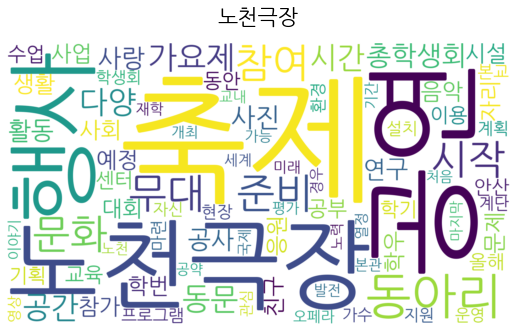

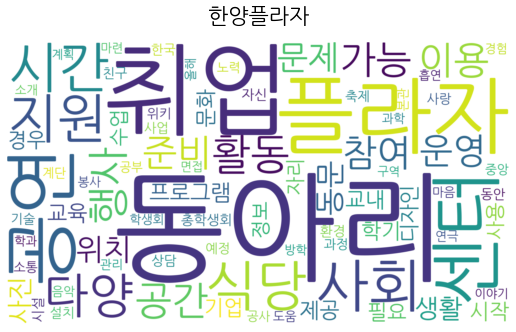

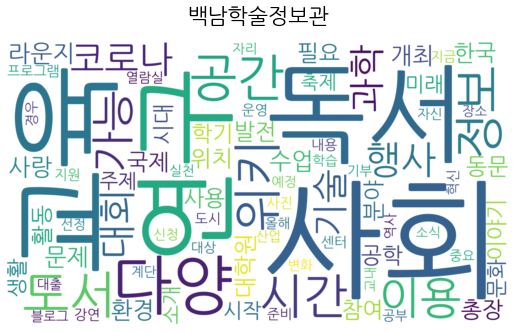

In [37]:
#wordcloud
import wordcloud
import matplotlib.pyplot as plt

N_WORDS = 80


wc = wordcloud.WordCloud(background_color="white", font_path = "NanumGothic", max_words = N_WORDS, collocations=False, width=1920, height=1080)

for subject in subject_view: #키워드에 맞게 워드클라우드를 각각 만들기 위함
    wc.generate_from_frequencies(body_word_counts_subject[subject]) #단어와 빈도가 함께 있는 body_word_counts_subject 사용. 

    plt.imshow(wc, interpolation= 'bilinear') 
    plt.axis('off') #축 숨기기
    plt.gcf().set_size_inches(9,10)
    plt.title(subject)
    plt.show()

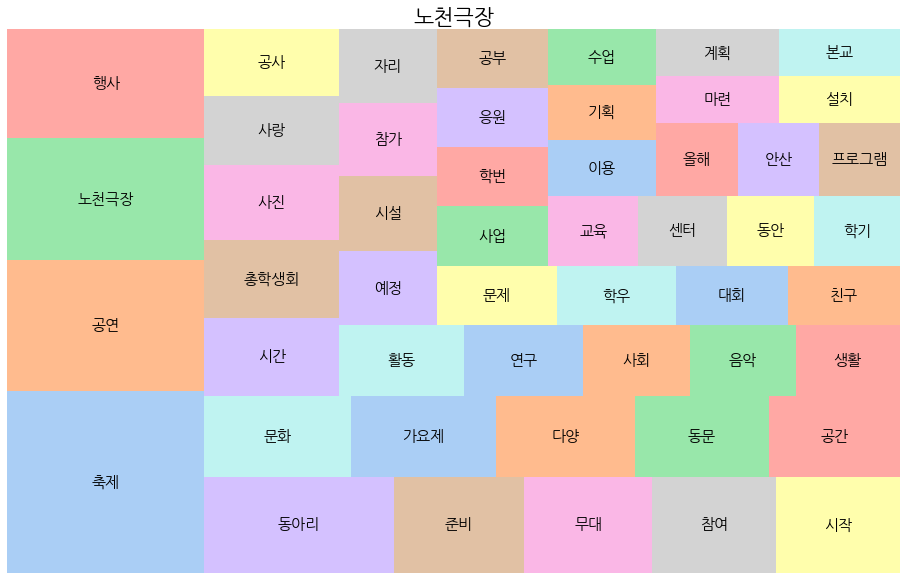

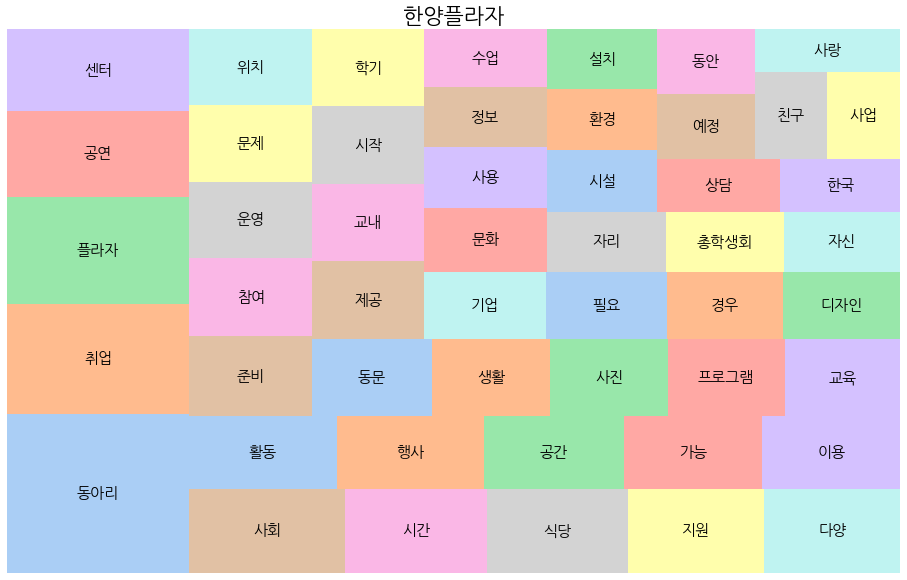

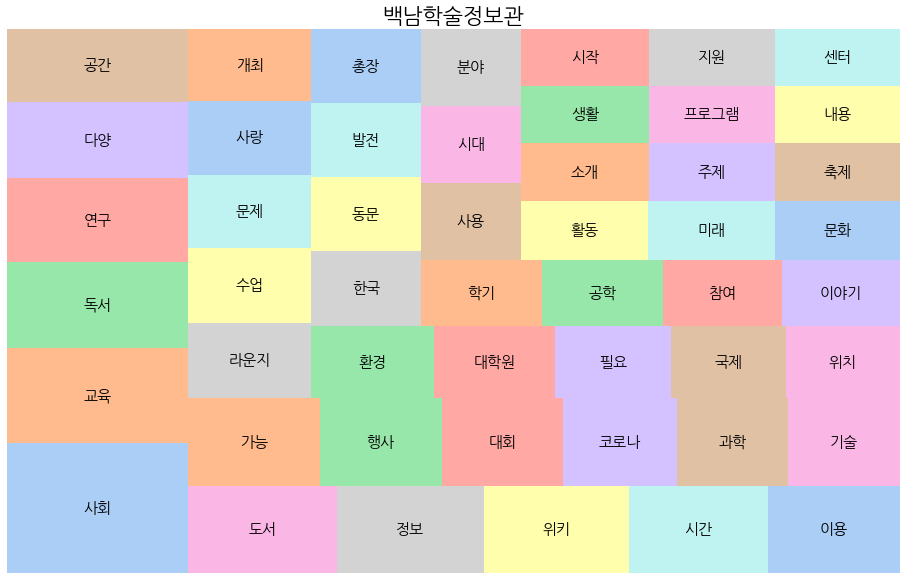

In [35]:
#squarify
import sys
import squarify
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

N_WORDS = 50
COLORS = sns.color_palette("pastel")
plt.rc('font', family="NanumGothic", size=18)

wc = wordcloud.WordCloud(background_color="white", max_words = N_WORDS, collocations=False, width=1920, height=1080)

for subject in subject_view:
    word_count_pairs = body_word_counts_subject[subject].most_common(N_WORDS)
    words, counts = zip(*word_count_pairs)
    squarify.plot(sizes=counts, label=words, color=COLORS, alpha=0.9,text_kwargs={'fontsize': 15})
    plt.axis("off")
    plt.title(subject)
    plt.gcf().set_size_inches(16, 10)
    plt.show()

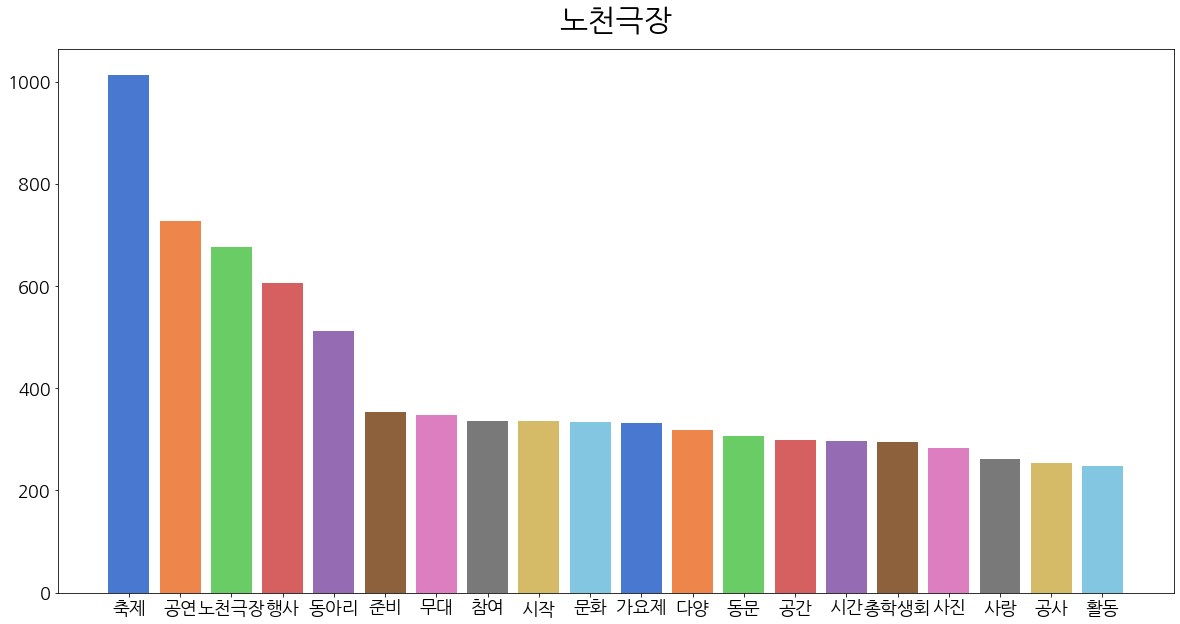

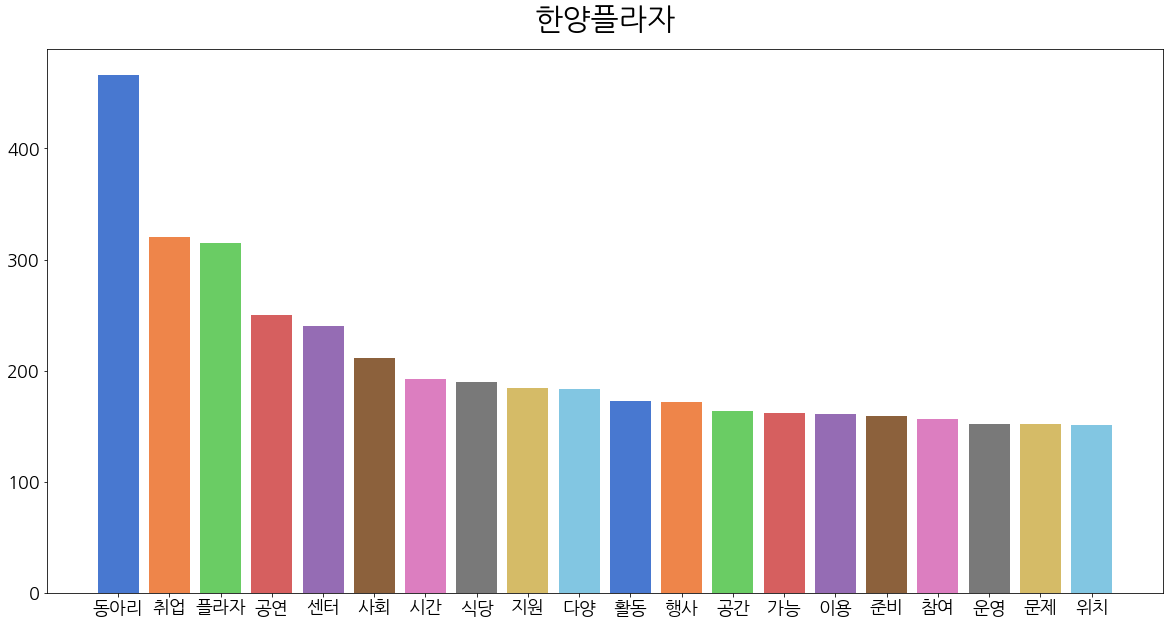

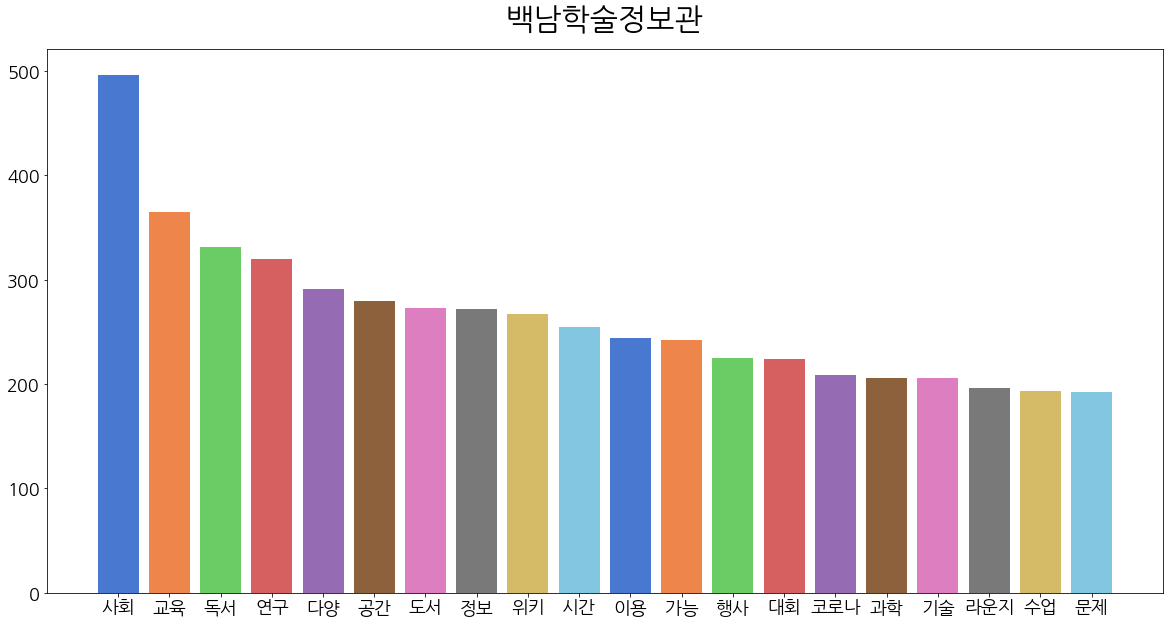

In [36]:
#막대그래프
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
rcParams['axes.titlepad'] = 20
rcParams['font.size'] = 18
plt.rc('font', family="NanumGothic", size=18)
COLORS = sns.color_palette("muted")

for subject in subject_view:
    plt.figure(figsize=(20, 10))
    plt.title(subject, fontsize = 30)
    labels, counts = zip(*body_word_counts_subject[subject].most_common(20))
    plt.bar(labels, counts, color=COLORS)
    plt.show()